# Alternative Umap

In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from luwiji.dimensionality_reduction import illustration

# t-Distributed Stochastic Neighbor Embedding

reduce dimension -> berusaha mempertahankan relative similarity

In [8]:
points = np.array([
    [0,0,0], [0,0,1],
    [0,1,0], [0,1,1],
    [1,0,0], [1,0,1],
    [1,1,0], [1,1,1],
])
labels = np.array(range(8))

In [21]:
tsne = TSNE(n_components=2, random_state=42, perplexity=7)

In [22]:
points_tsne = tsne.fit_transform(points)

In [23]:
points_tsne.shape

(8, 2)

(-84.55886135101318, 70.73357067108154, -71.38662872314453, 83.09512481689453)

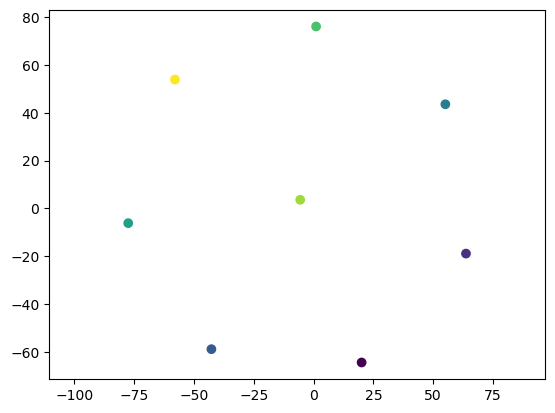

In [25]:
plt.scatter(points_tsne[:, 0], points_tsne[:, 1], c=labels)
plt.axis('equal')

# Import Data

In [26]:
df = pd.read_csv('data/small_fmnist.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,162,167,84,30,38,94,177,176,26,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,41,147,228,242,228,...,231,231,228,229,212,0,0,1,0,0,0,0,0,0,0,0,0,0,0,101,157,148,148,167,180,182,179,176,172,171,164,177,163,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,142,205,...,84,240,194,186,181,192,133,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,15,13,5,10,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,40,122,0,0,0,0,0,0,0,28,146,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,193,122,...,171,176,180,189,193,139,0,0,0,0,0,0,0,0,0,0,0,0,80,133,155,159,157,162,157,161,161,163,151,145,125,93,87,49,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,2,112,139,176,171,173,196,218,118,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,117,157,212,255,...,176,201,188,187,249,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,93,141,165,197,173,196,203,176,167,163,154,118,66,0,0,0,0,0,0,0


In [27]:
label2cat = {
    0: "T-Shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

# Dataset Splitting

In [28]:
X = df.drop(columns='label')
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

# Visualization with tSNE

In [29]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

Text(0, 0.5, 'TSNE 2')

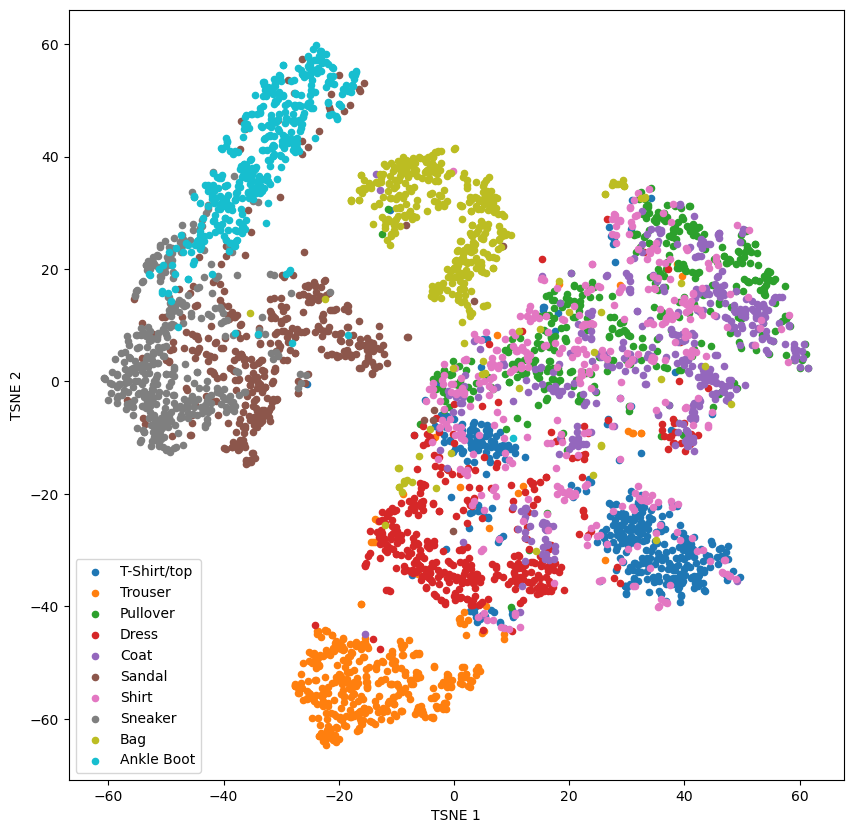

In [30]:
plt.figure(figsize=(10,10))
for i in range(10):
    mask = y_train == i
    plt.scatter(X_train_tsne[mask, 0], X_train_tsne[mask, 1], s=20, label=label2cat[i])
plt.legend()
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

## Visualization with PCA

Text(0, 0.5, 'PCA 2')

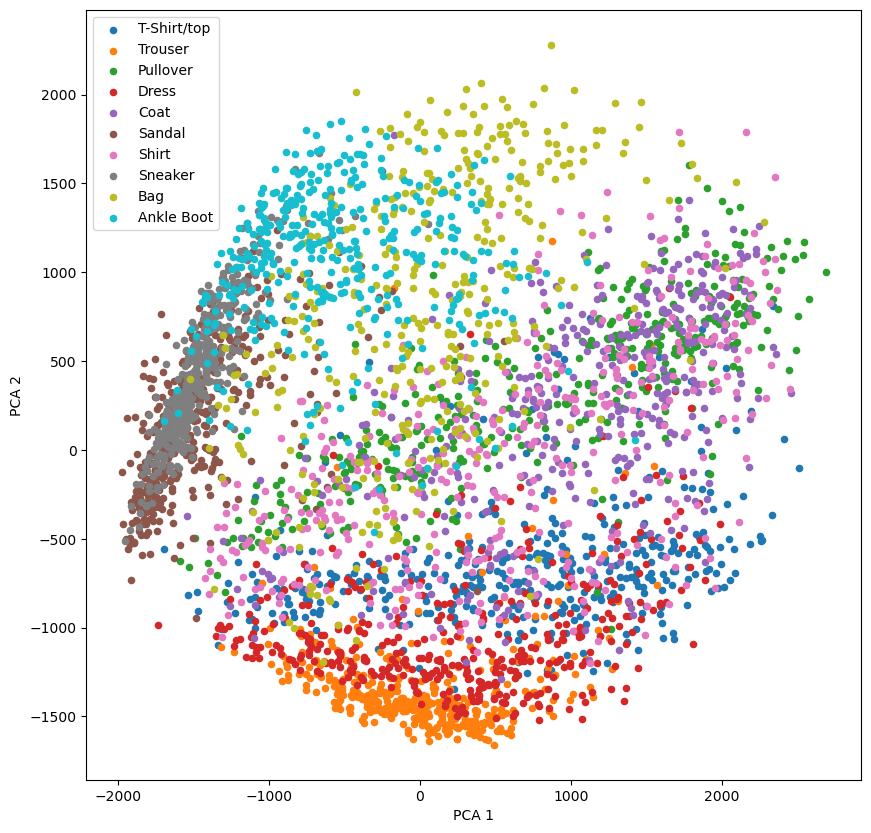

In [40]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
plt.figure(figsize=(10,10))

for i in range(10):
    mask = y_train == i
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], s=20, label=label2cat[i])
plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Here Is TSNE Visualization on Text data

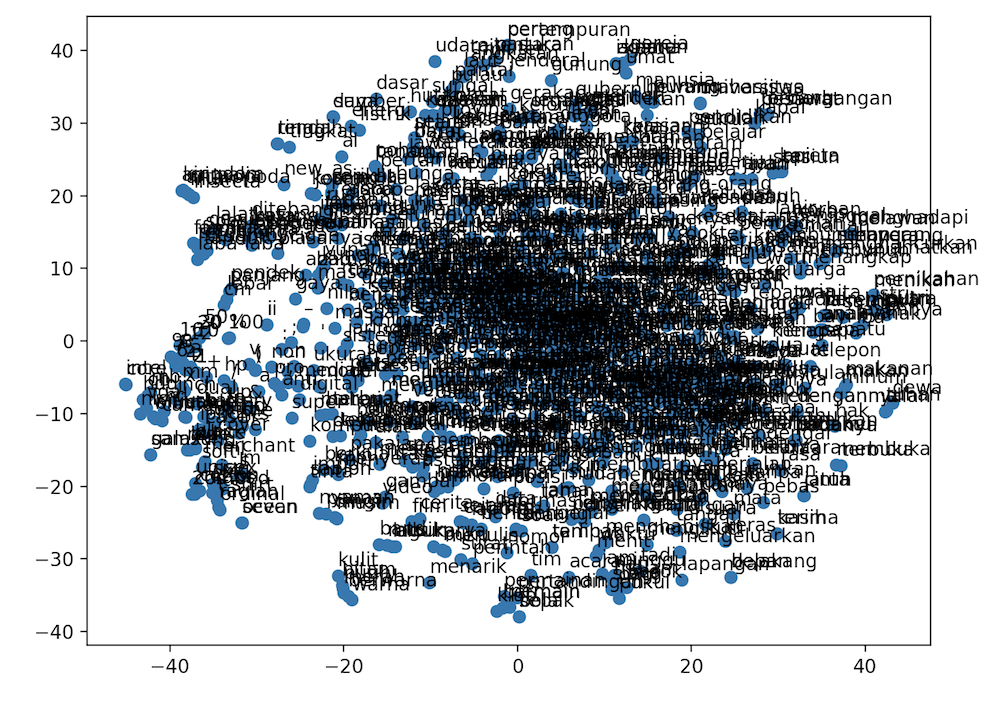

In [32]:
illustration.tsne_1

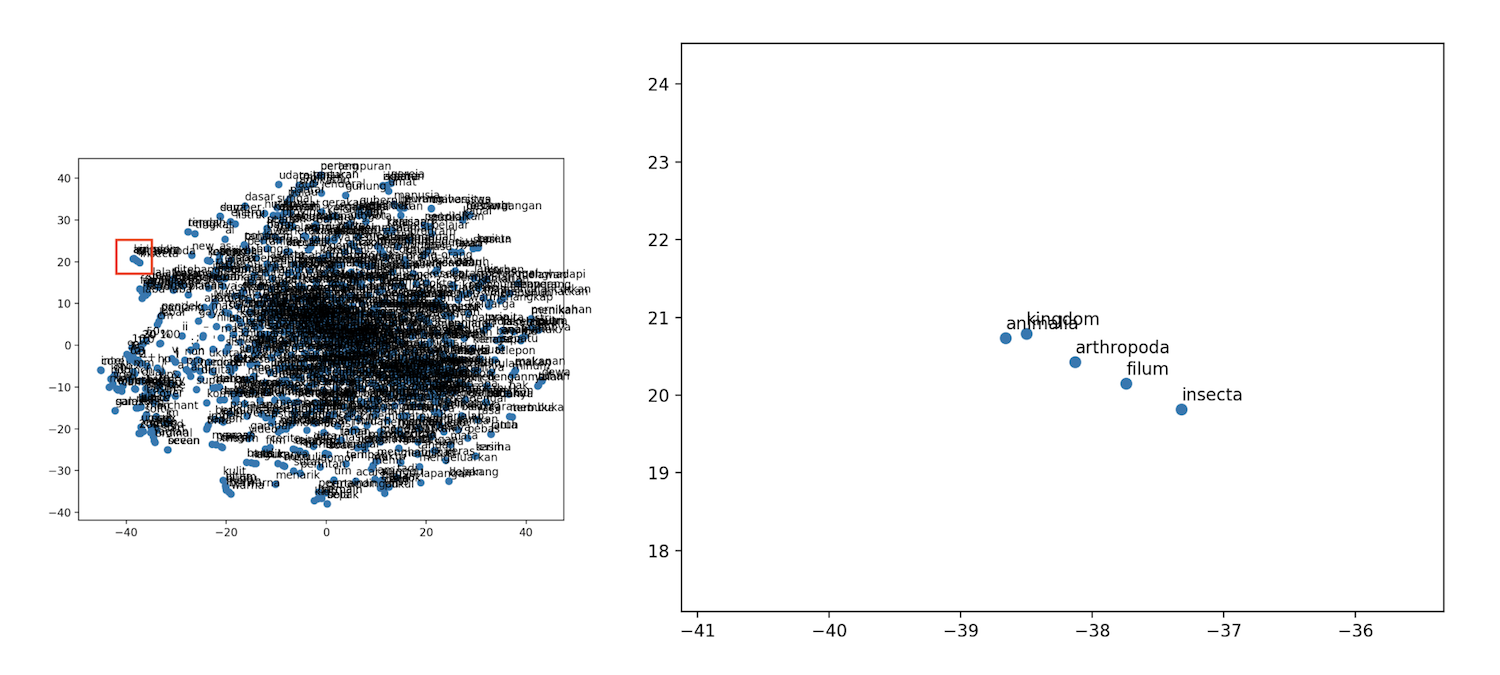

In [33]:
illustration.tsne_2

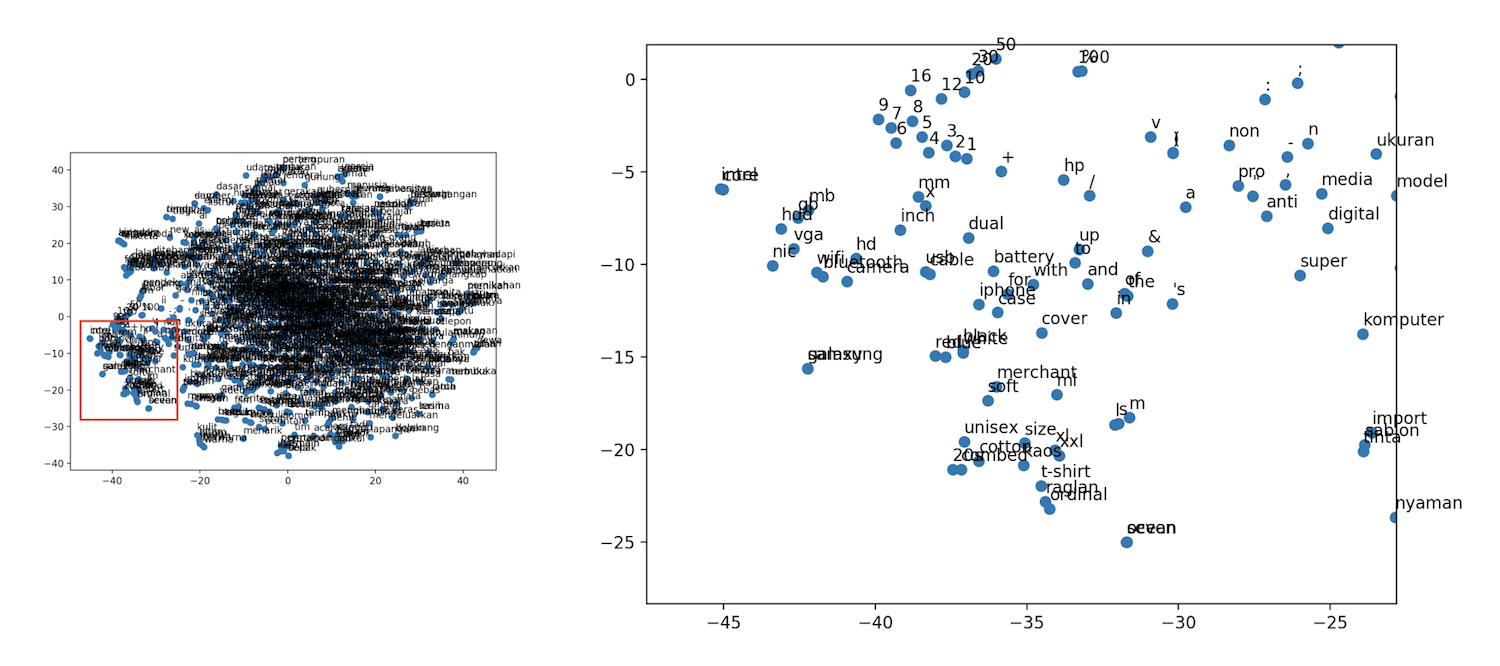

In [34]:
illustration.tsne_3

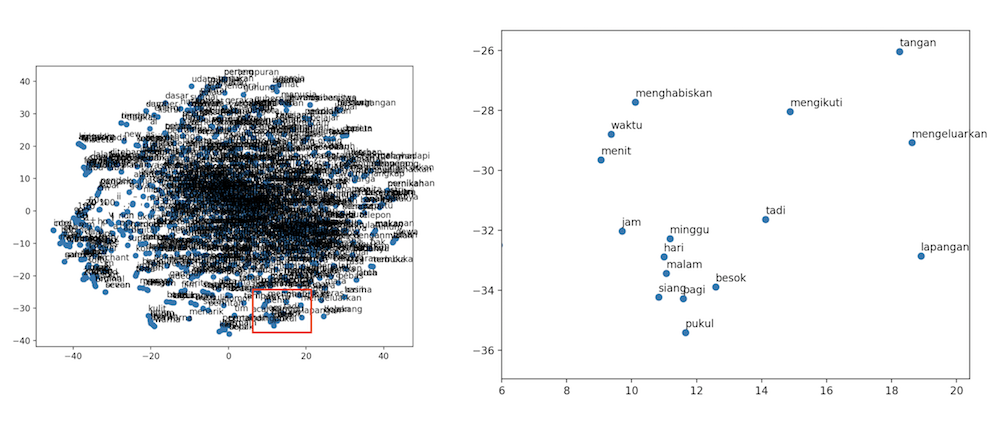

In [36]:
illustration.tsne_4

In [37]:
import umap

/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Text(0, 0.5, 'UMAP 2')

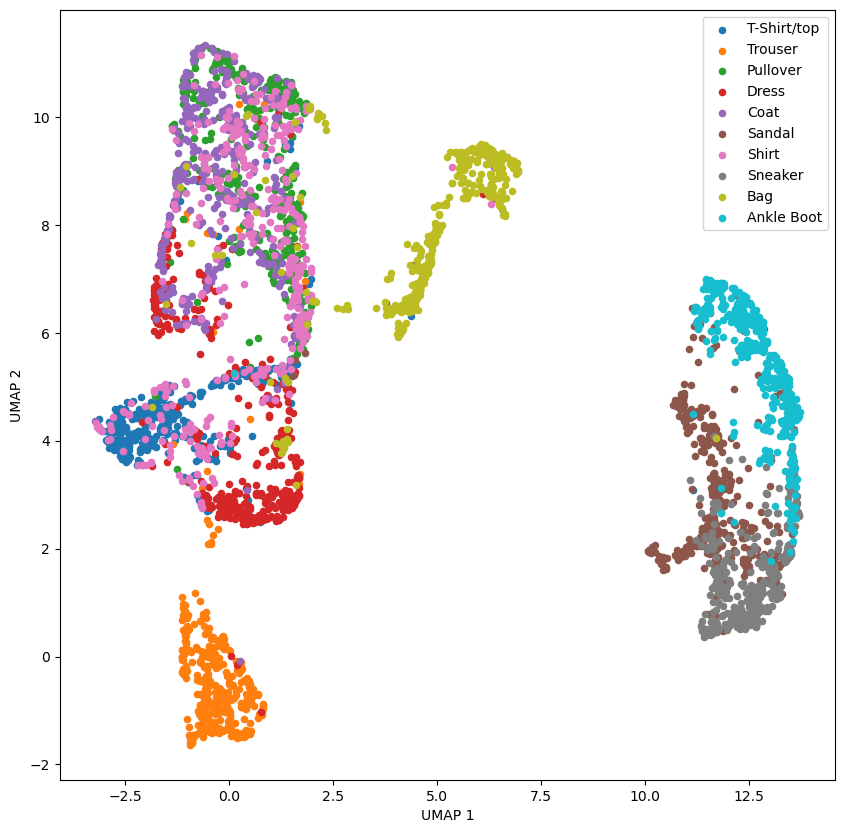

In [39]:
reducer = umap.UMAP()
X_train_umap = reducer.fit_transform(X_train)
plt.figure(figsize=(10,10))

for i in range(10):
    mask = y_train == i
    plt.scatter(X_train_umap[mask, 0], X_train_umap[mask, 1], s=20, label=label2cat[i])
plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')